<a href="https://colab.research.google.com/github/viaNNation/Titanic/blob/main/Titanic_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#import das bibliotecas que iremos usar para plotar os gráficos da nossa base de dados já tratada

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#import do data set já tratado diretamente do github

titanic = pd.read_csv('https://raw.githubusercontent.com/viaNNation/Titanic/main/clean_titanic_data.csv')
titanic.head (5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [23]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
#vamos armazenar os nomes em um novo data frame para evitarmos problemas com as correlações e geração de gráficos

name_df = titanic[["Name"]]
titanic.drop(["Name"], axis=1, inplace=True)

In [25]:
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
#precisamos converter os valores male pra 1, e female pra 0, na coluna Sex

titanic["Sex"] = titanic["Sex"].apply(lambda x: 1 if x == "male" else 0)
titanic.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [27]:
# prompt: quero ver quais são todos os valores diferentes para a coluna embarked

unique_embarked = titanic["Embarked"].unique()
print(unique_embarked)


['S' 'C' 'Q']


In [29]:
#Vamos converter os valores de embarked para numéricos
# Dicionário para mapeamento
mapa_valores = {'S': 0, 'C': 1, 'Q': 2}

# Substitua os valores na coluna 'Embarked' usando o mapeamento
titanic['Embarked'] = titanic['Embarked'].replace(mapa_valores)

# Verifique as primeiras linhas do DataFrame para confirmar a substituição
titanic.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
5,0,3,1,25.0,0,0,8.4583,2
6,0,1,1,54.0,0,0,51.8625,0
7,0,3,1,2.0,3,1,21.0750,0
8,1,3,0,27.0,0,2,11.1333,0
9,1,2,0,14.0,1,0,30.0708,1


In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


<Axes: >

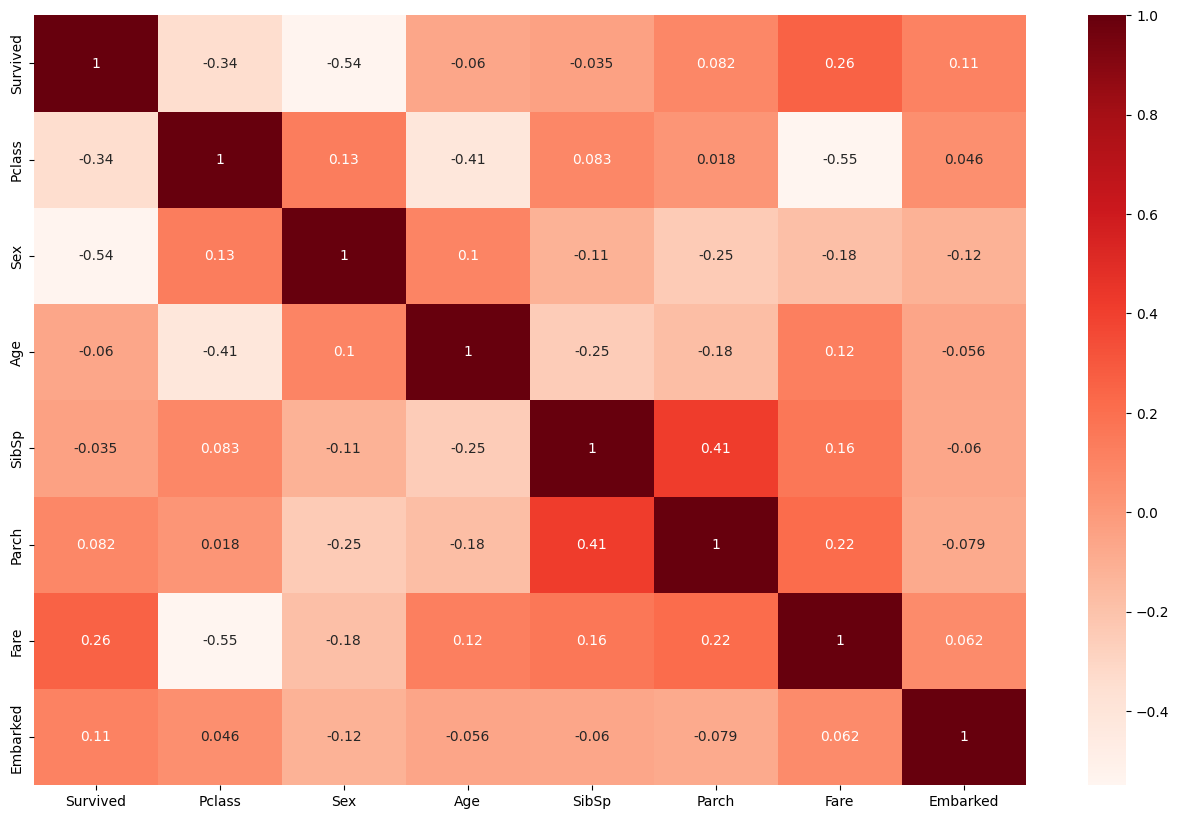

In [31]:
#agora que todos os nossos valores são numéricos, conseguimos ver a correlação das variáveis para testarmos as hipoteses

#vendo as correlações das variáveis

plt.figure(figsize = (16, 10))
sns.heatmap(titanic.corr(), annot = True, cmap = 'Reds')

In [ ]:
#conseguunis ver algumas correlações interessantes, como fare. E algumas correlações inversas, como Sex e Pclass.

In [32]:
titanic.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [33]:
#separando as variáveis em numericas e categoricas

categoricas = ['Pclass', 'Sex', 'Embarked']
numericas = ['Age', 'SibSp', 'Parch', 'Fare',]

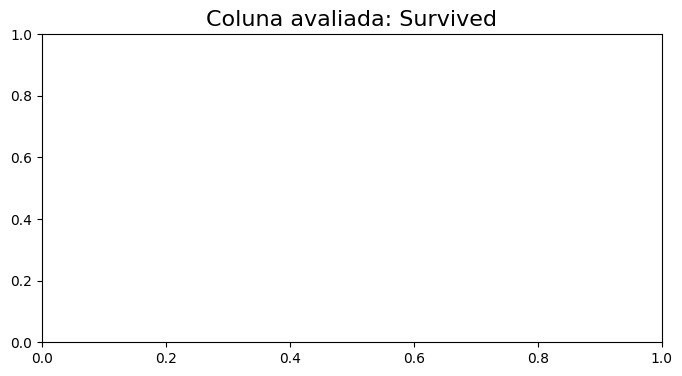

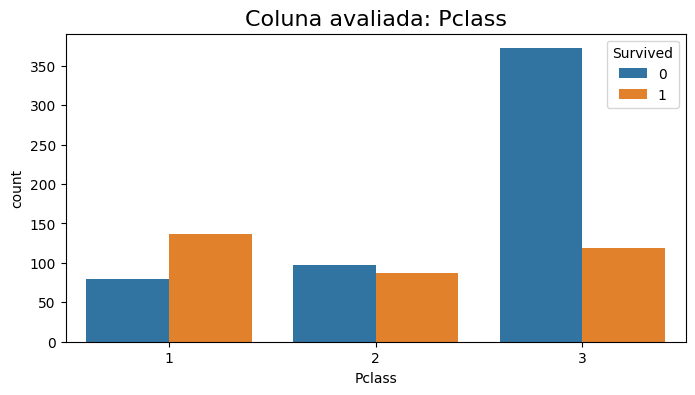

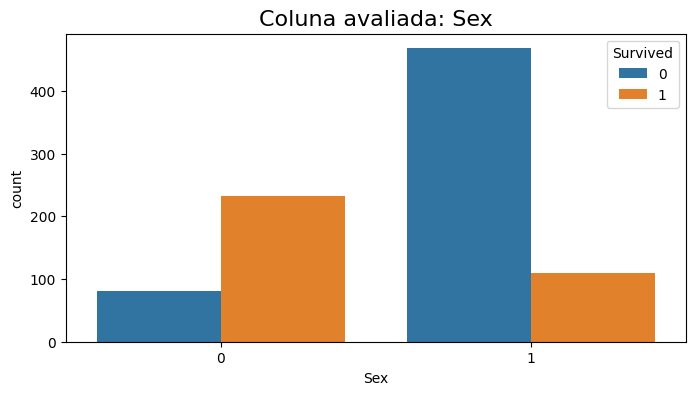

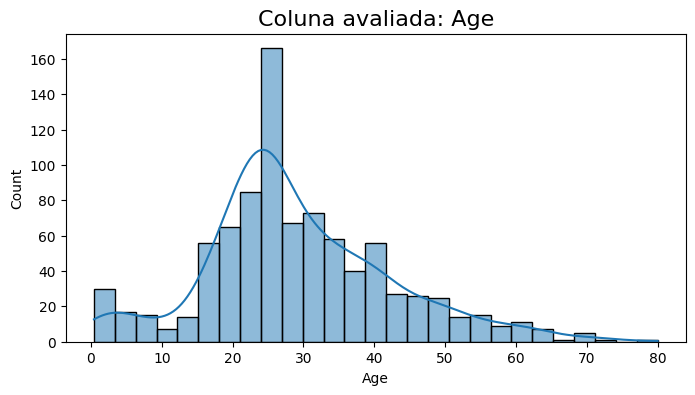

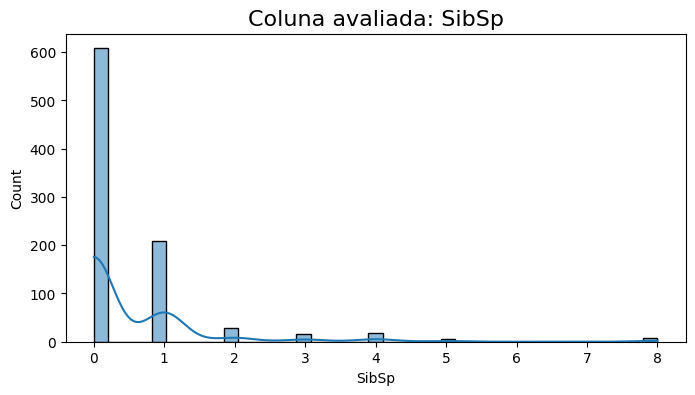

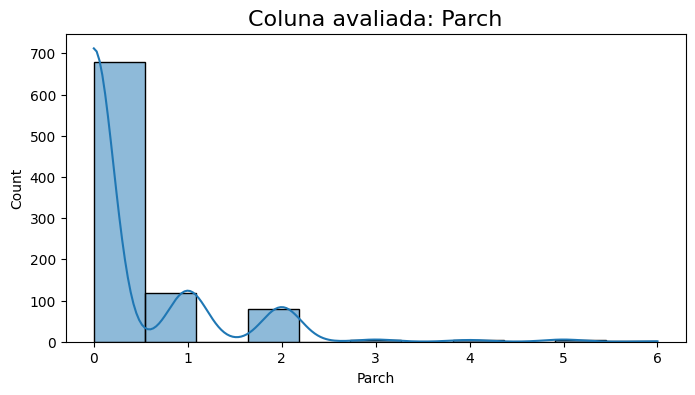

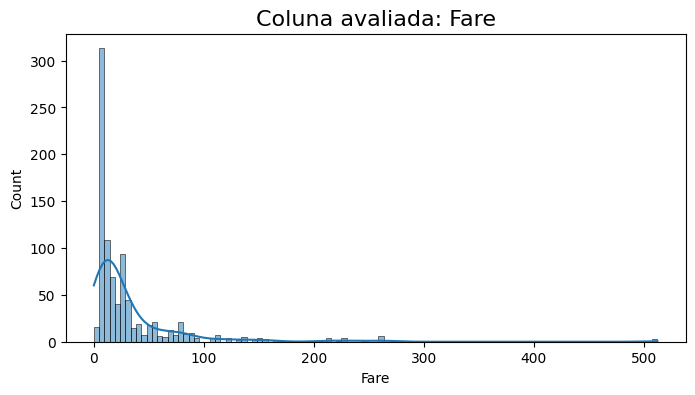

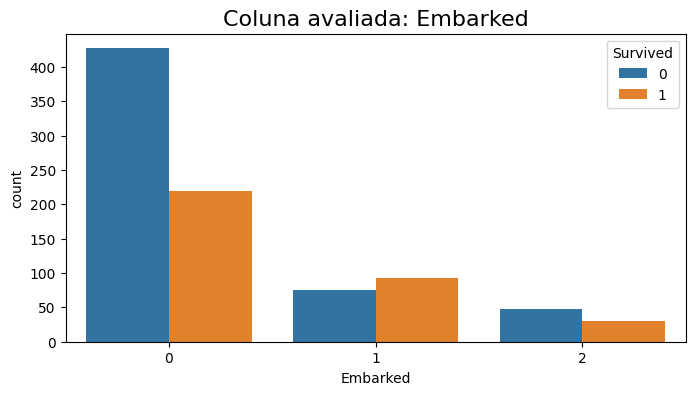

In [34]:
#plotando graficos para visualizações simplificadas das nossas variáveis

for c in titanic.columns:
  plt.figure(figsize = (8, 4))
  plt.title (f"Coluna avaliada: {c}", fontsize = 16 )
  if c in categoricas:
    sns.countplot(x = titanic[c], hue = titanic['Survived'])
  if c in numericas:
    sns.histplot(titanic[c], kde = True)